In [1]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot

In [ ]:
keepers = pd.read_csv("/content/drive/MyDrive/PYTHON/data_science/Projects/3. FIFA 18 Player Value Prediction/Preprocessed/keepers.csv")
keepers.head()

,Name,Nationality,Club,Preferred Positions,Age,Special,Acceleration,Aggression,Agility,Balance,...,Sprint speed,Stamina,Vision,Volleys,Strength,Reactions,Overall,Potential,Wage,Value
0,Cristiano Ronaldo,Portugal,Real Madrid CF,ST LW,32,2228,89.0,63.0,89.0,63.0,...,91.0,92.0,85.0,88.0,80.0,96.0,94,94,565000.0,95500000.0
1,L. Messi,Argentina,FC Barcelona,RW,30,2154,92.0,48.0,90.0,95.0,...,87.0,73.0,90.0,85.0,59.0,95.0,93,93,565000.0,105000000.0
2,Neymar,Brazil,Paris Saint-Germain,LW,25,2100,94.0,56.0,96.0,82.0,...,90.0,78.0,80.0,83.0,53.0,88.0,92,94,280000.0,123000000.0
3,L. Suárez,Uruguay,FC Barcelona,ST,30,2291,88.0,78.0,86.0,60.0,...,77.0,89.0,84.0,88.0,80.0,93.0,92,92,510000.0,97000000.0
4,R. Lewandowski,Poland,FC Bayern Munich,ST,28,2143,79.0,80.0,78.0,80.0,...,83.0,79.0,78.0,87.0,84.0,91.0,91,91,355000.0,92000000.0


In [ ]:
keepers.shape

(4562, 35)

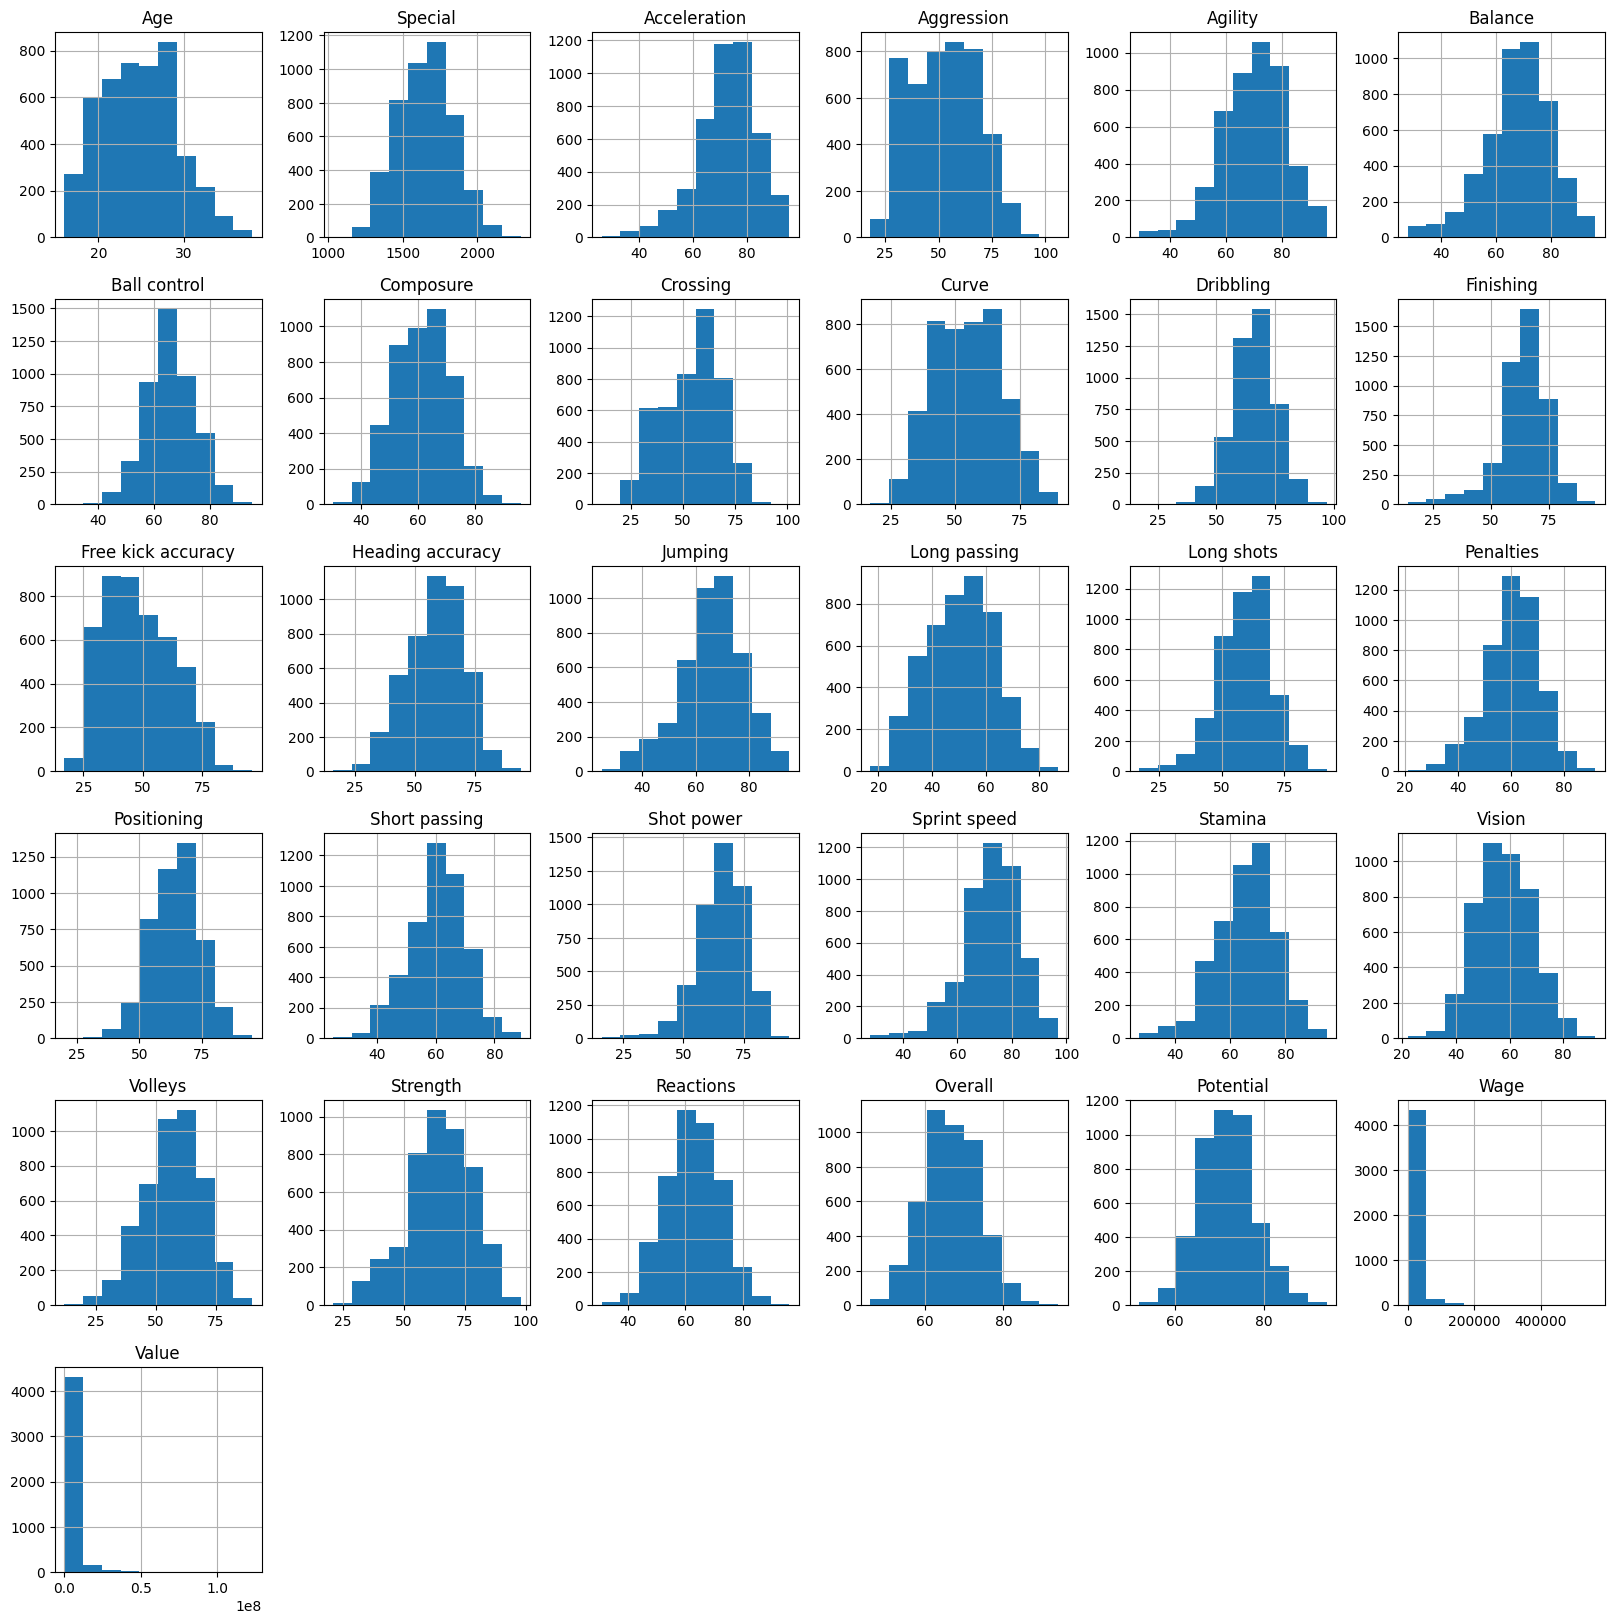

In [ ]:
keepers.hist( figsize=( 20, 20 ) )
pyplot.show()

In [ ]:
nationality = keepers.Nationality.value_counts()
nationality

Nationality
England       450
Argentina     254
Germany       247
Spain         245
France        243
             ... 
Estonia         1
Belarus         1
Somalia         1
Eritrea         1
Kyrgyzstan      1
Name: count, Length: 141, dtype: int64

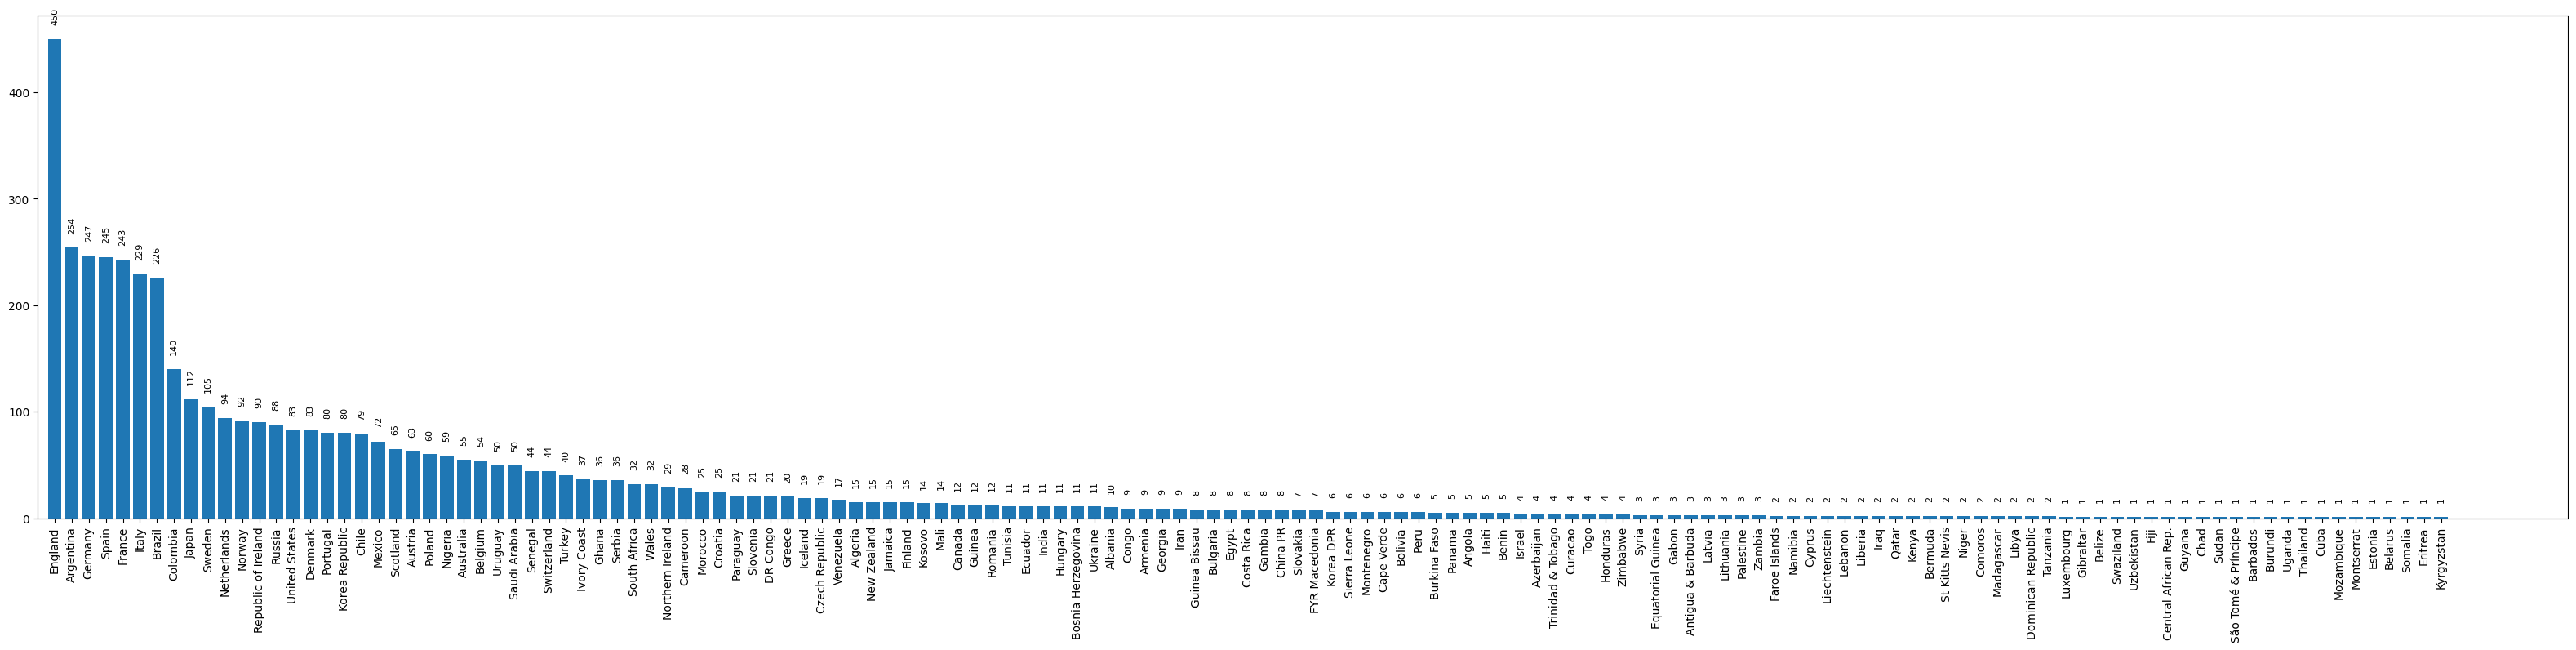

In [ ]:
# num_bins=100
pyplot.figure( figsize=(40, 8) )

pyplot.bar( x=nationality.index, height=nationality.values, width=0.8, )

# pyplot.xlim( -1, num_bins+1 )
pyplot.xlim( left=-1 )

pyplot.xticks( rotation=90 )

# for i, v in enumerate(  nationality.values.tolist()[ :num_bins+1 ] ):

for i, v in enumerate(  nationality.values.tolist() ):
  pyplot.text( i, v+15, str(v), ha='center', fontsize=8, rotation=90 )


pyplot.show()

# commented code where previously created for getting plot of first 100 nationlity.

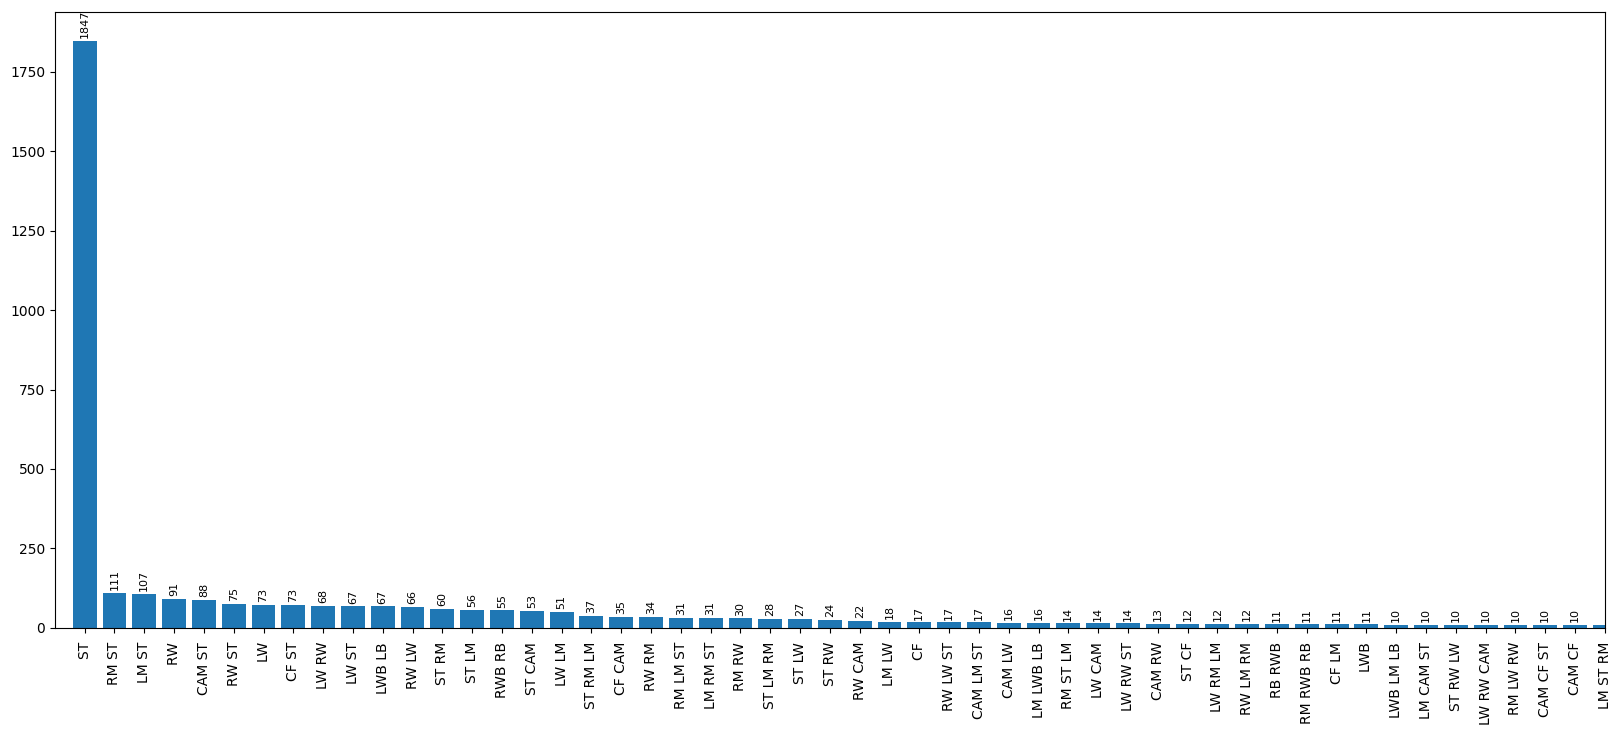

In [ ]:
positions = keepers['Preferred Positions'].value_counts()

num_bins=50
pyplot.figure( figsize=(20, 8) )

pyplot.bar( x=positions.index, height=positions.values, width=0.8, )

pyplot.xlim( -1, num_bins+1 )
pyplot.xlim( left=-1 )

pyplot.xticks( rotation=90 )

for i, v in enumerate(  positions.values.tolist()[ :num_bins+1 ] ):
  pyplot.text( i, v+15, str(v), ha='center', fontsize=8, rotation=90 )


pyplot.show()

In [ ]:
keepers.Club.value_counts()

Club
SG Sonnenhof Großaspach      15
Sogndal                      15
FC Nordsjælland              15
Kaizer Chiefs                14
Pachuca                      14
                             ..
CD Palestino                  3
Atlético Clube Goianiense     3
PEC Zwolle                    2
FC Midtjylland                2
Osmanlıspor                   2
Name: count, Length: 647, dtype: int64

From above keepers we can see that,

Maximum 35 players are from a club and minimum 20. so making "club - number of players" chart will be inefficient.

but another idea is that we can look for the clubs of top 100 rated players or 100 players with top potential.

# 100 Top Rated players

In [ ]:
top100 = keepers[ :100 ] # the keepers is already sorted based on overall rating so we just need to take top 100 rows to get top 100 rated players

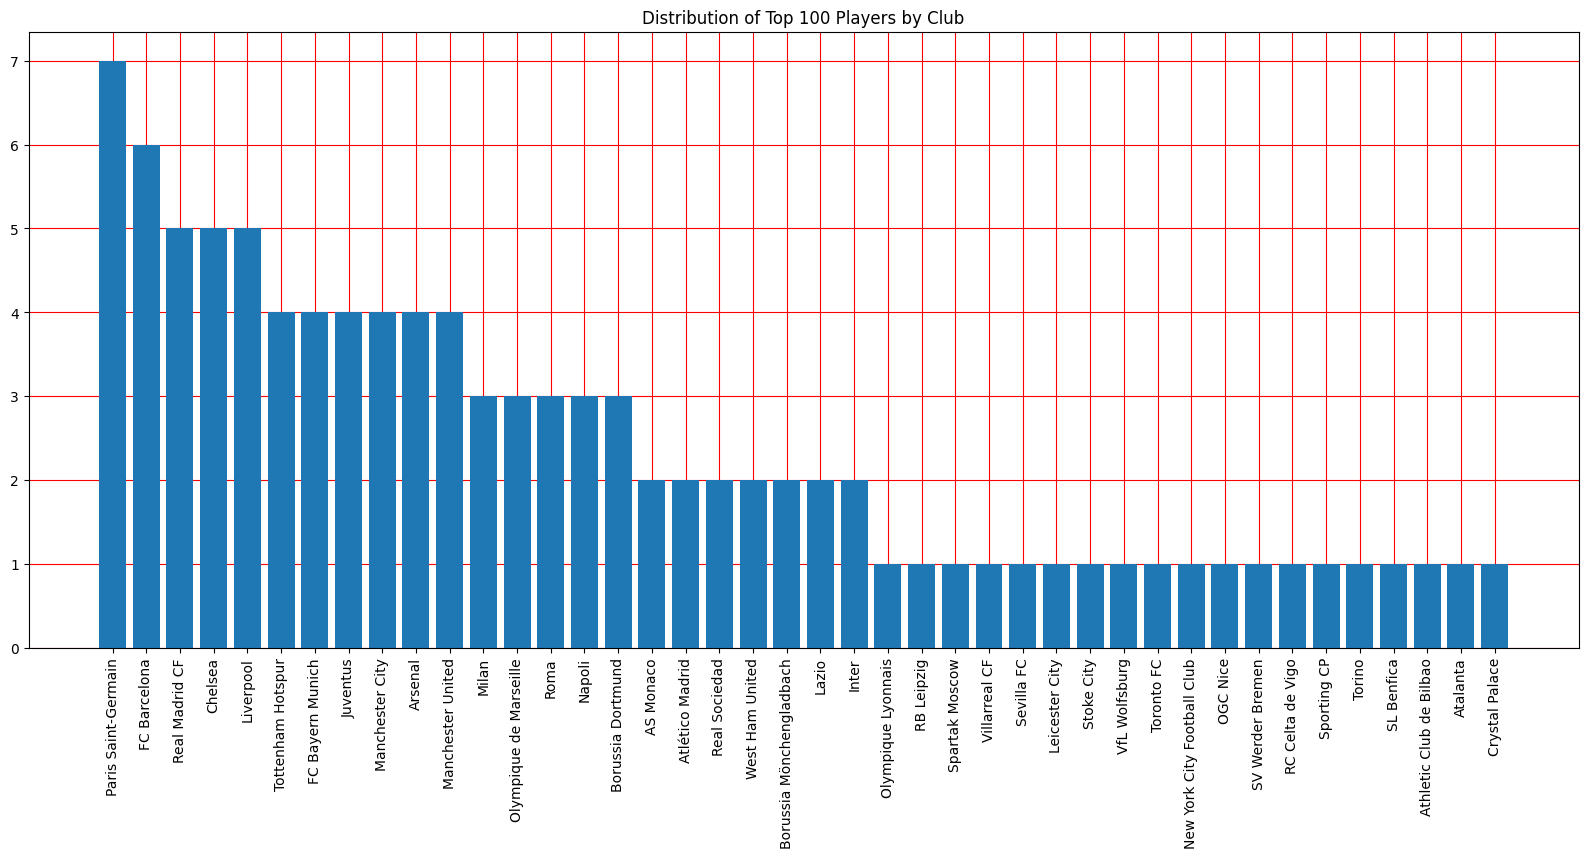

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 13, 1 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("Distribution of Top 100 Players by Club")

pyplot.bar( x=top100.Club.value_counts().index, height=top100.Club.value_counts().values, width=0.8, zorder=2 )
pyplot.show()

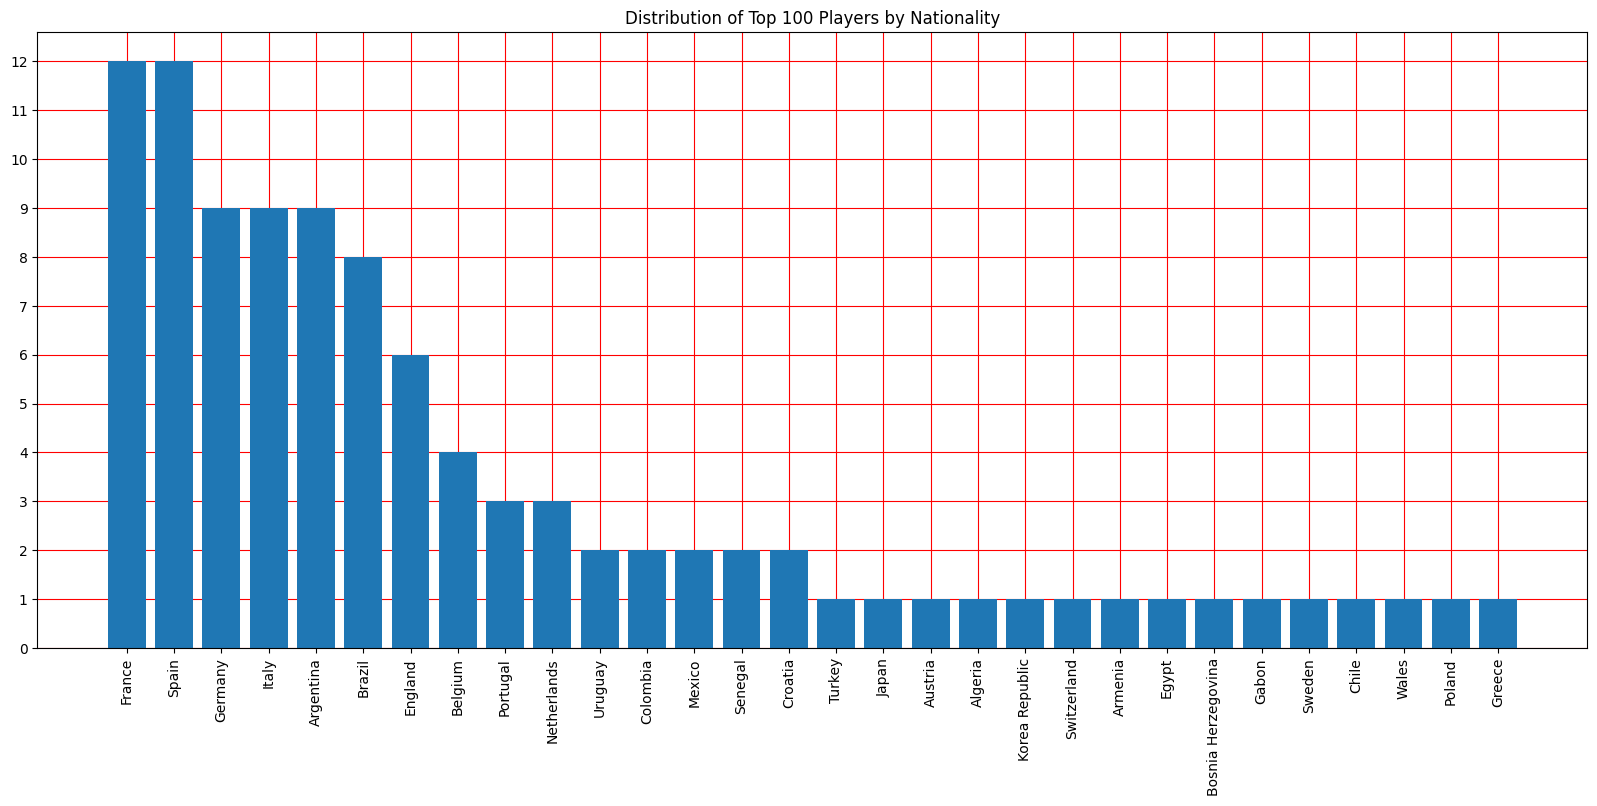

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 18, 1 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("Distribution of Top 100 Players by Nationality")

pyplot.bar( x=top100.Nationality.value_counts().index, height=top100.Nationality.value_counts().values, width=0.8, zorder=2 )
pyplot.show()

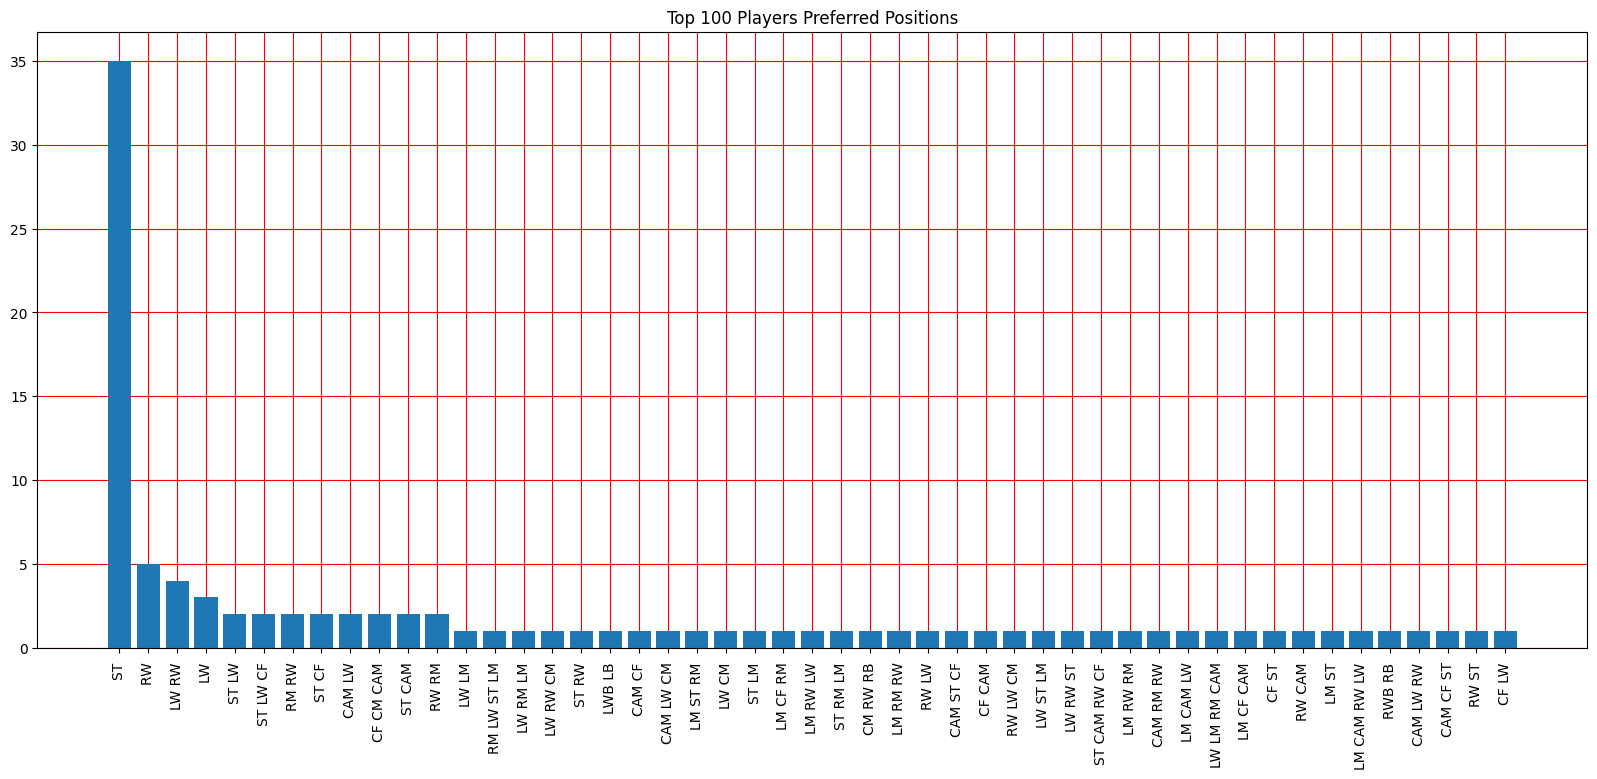

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 50, 5 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("Top 100 Players Preferred Positions")

pyplot.bar( x=top100['Preferred Positions'].value_counts().index, height=top100['Preferred Positions'].value_counts().values, width=0.8, zorder=2 )
pyplot.show()

# 100 Player with top Potential

In [ ]:
potential100 = keepers.sort_values( by='Potential', ascending=False, ignore_index=True )[ :100 ]

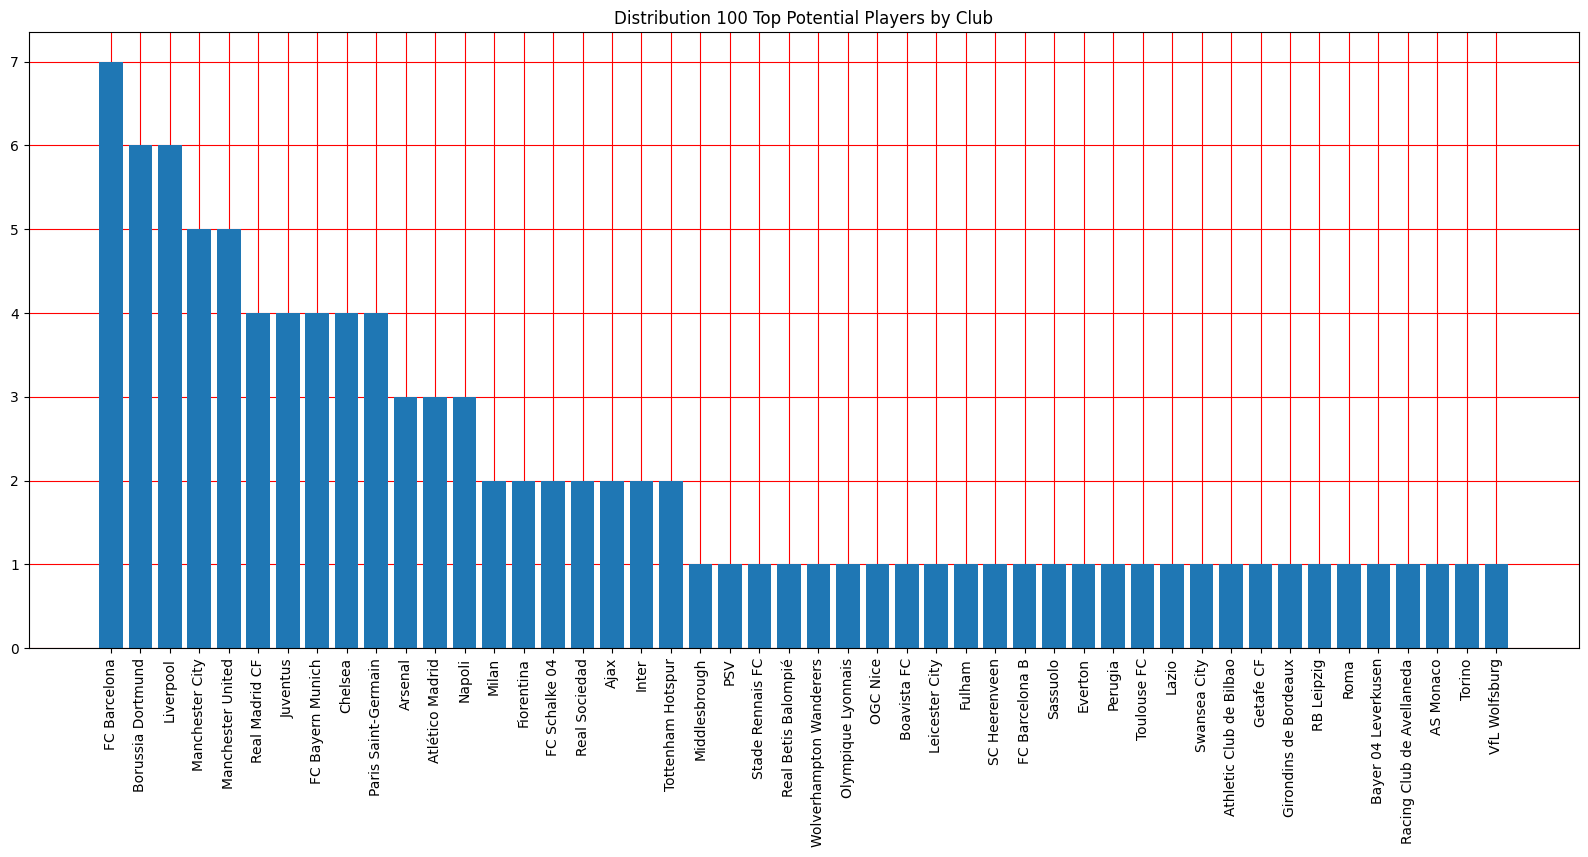

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 12, 1 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("Distribution 100 Top Potential Players by Club")

pyplot.bar( x=potential100.Club.value_counts().index, height=potential100.Club.value_counts().values, width=0.8, zorder=2 )
pyplot.show()

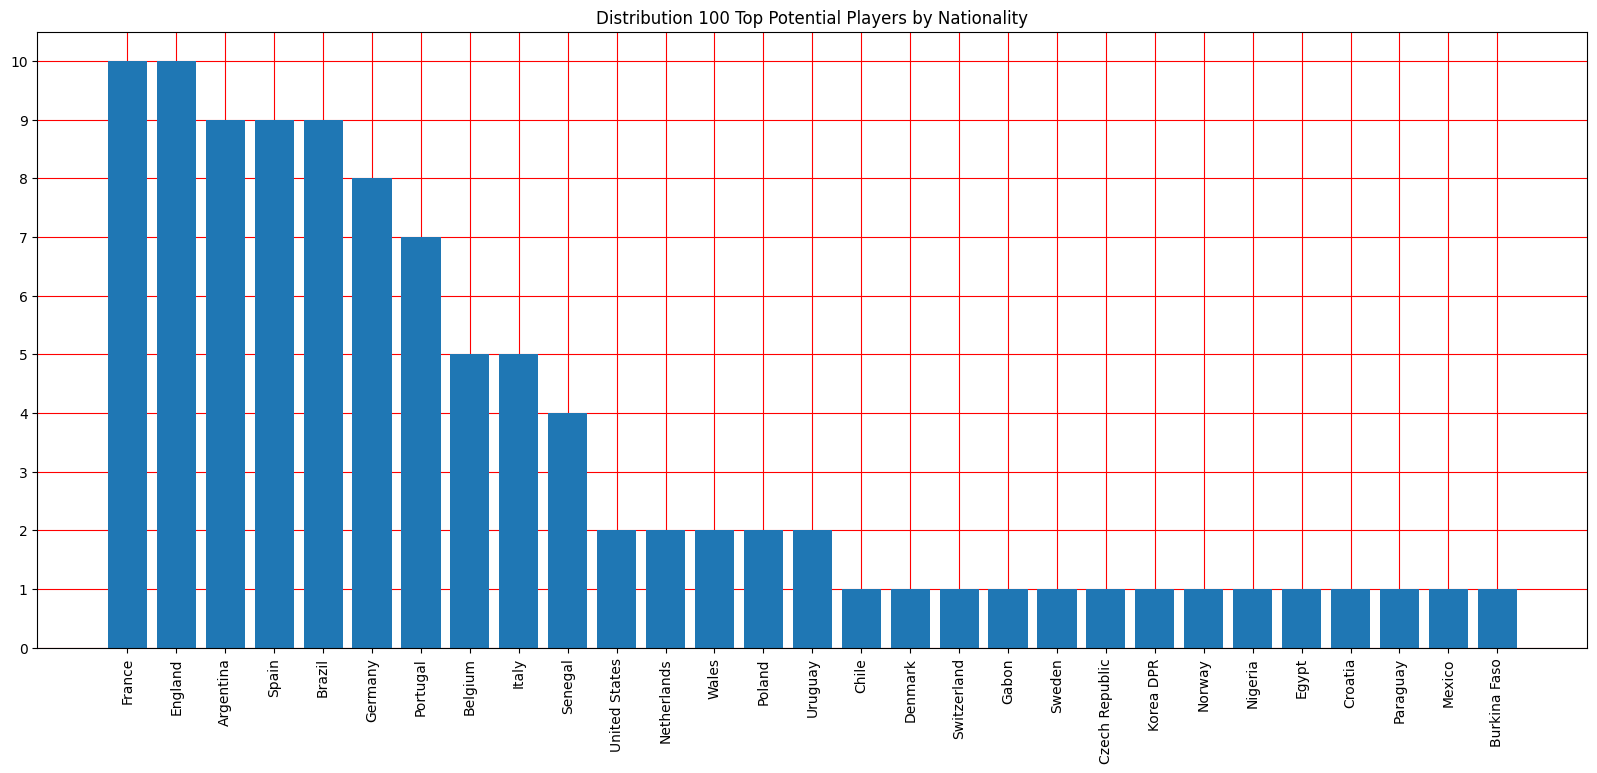

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 18, 1 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("Distribution 100 Top Potential Players by Nationality")

pyplot.bar( x=potential100.Nationality.value_counts().index, height=potential100.Nationality.value_counts().values, width=0.8, zorder=2 )
pyplot.show()

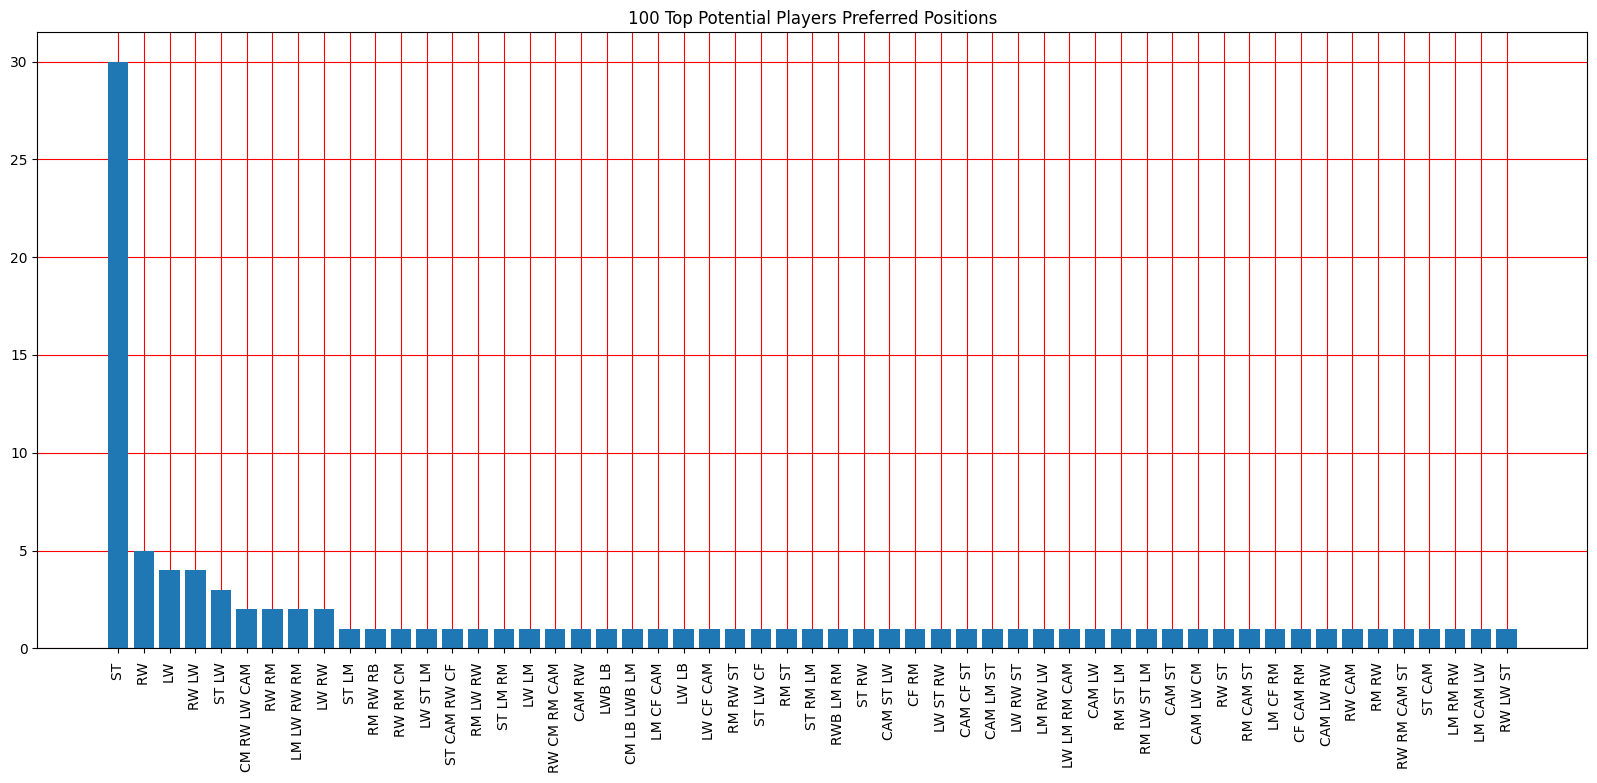

In [ ]:
pyplot.figure( figsize=(20, 8) )

pyplot.xticks( rotation=90 )
pyplot.yticks( range( 0, 50, 5 ) )

pyplot.grid(True, color='r', zorder=1)
pyplot.title("100 Top Potential Players Preferred Positions")

pyplot.bar( x=potential100['Preferred Positions'].value_counts().index, height=potential100['Preferred Positions'].value_counts().values, width=0.8, zorder=2 )
pyplot.show()

# Age

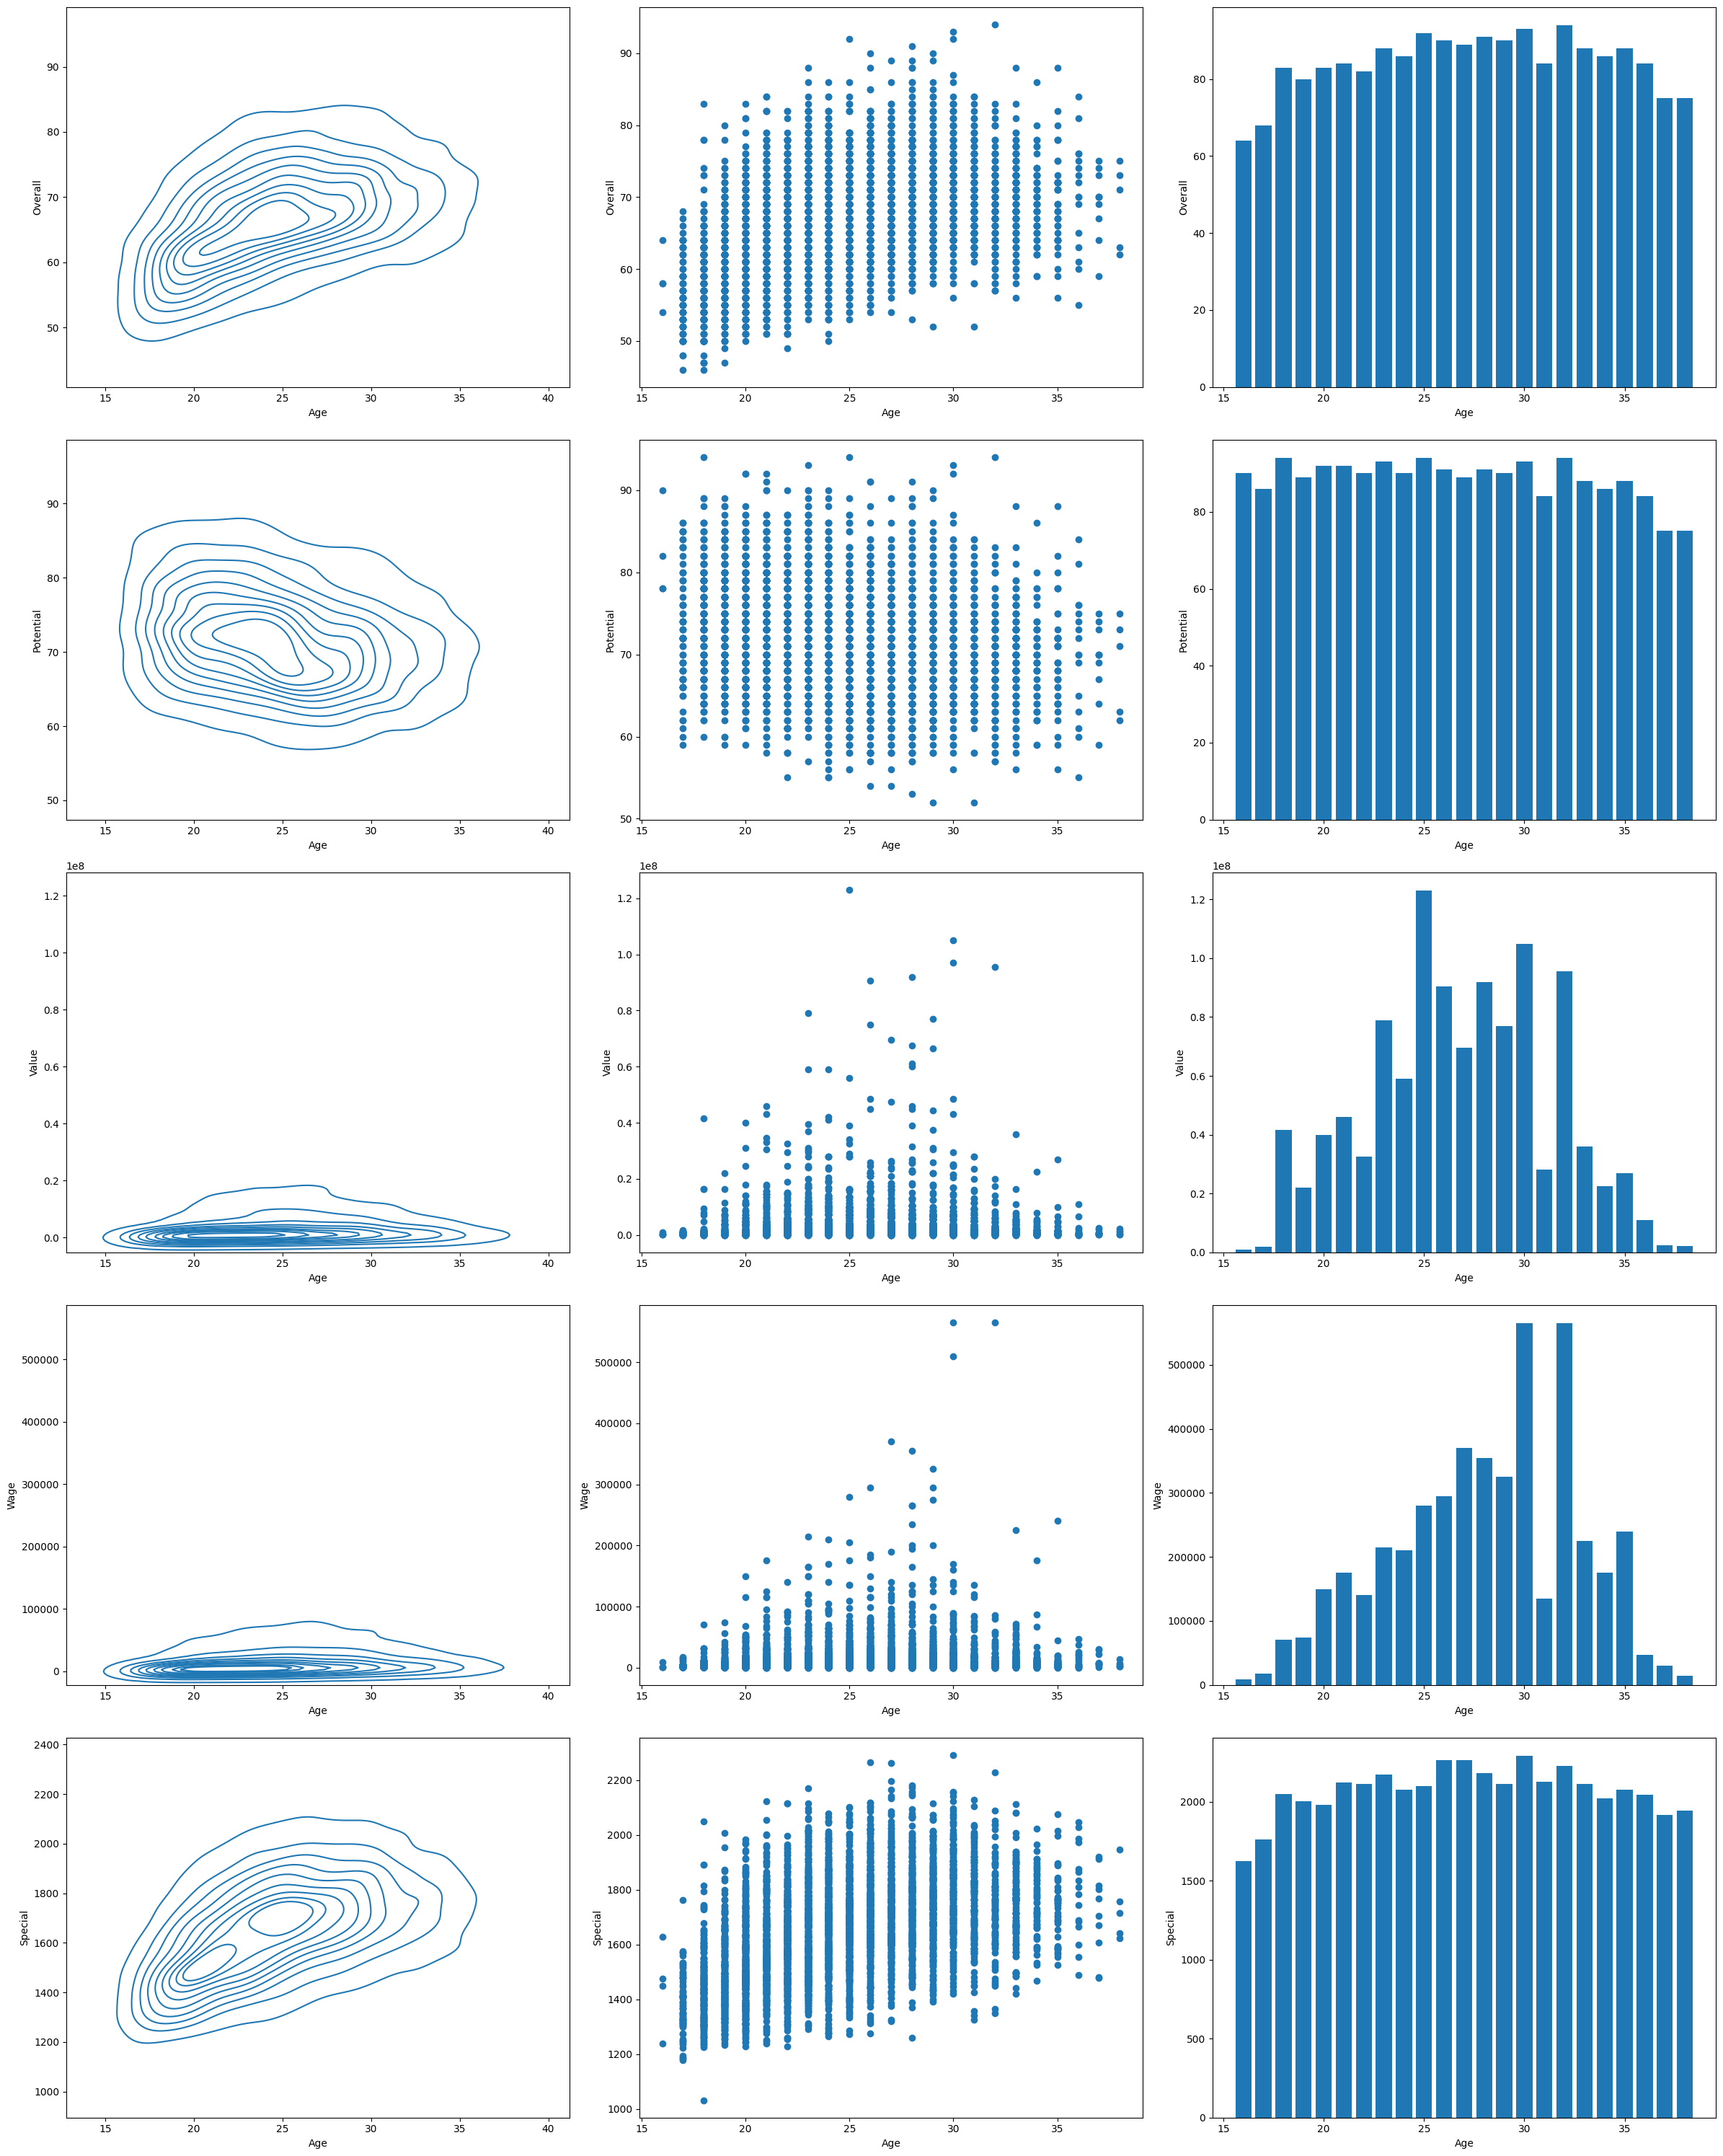

In [ ]:
lst = [ 'Overall', 'Potential', 'Value', 'Wage', 'Special']

fig, axes = pyplot.subplots( 5, 3, figsize=( 3*8, 5*6 ) )

for feature, ax in zip( lst, axes ):

  sns.kdeplot(data=keepers, x='Age', y=feature, ax = ax[0])

  ax[1].scatter( keepers.Age, keepers[feature] )
  ax[1].set_xlabel("Age")
  ax[1].set_ylabel( feature )

  ax[2].bar( x=keepers.Age, height=keepers[feature], width=0.8 )
  ax[2].set_xlabel("Age")
  ax[2].set_ylabel( feature )

pyplot.tight_layout()
pyplot.show()

In [ ]:
keepers.shape

(4562, 35)

In [ ]:
keepers.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Jumping', 'Long passing',
       'Long shots', 'Penalties', 'Positioning', 'Short passing', 'Shot power',
       'Sprint speed', 'Stamina', 'Vision', 'Volleys', 'Strength', 'Reactions',
       'Overall', 'Potential', 'Wage', 'Value'],
      dtype='object')

In [ ]:
lst = keepers.drop(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age','Overall', 'Potential', 'Value', 'Wage', 'Special'], axis=1).columns.tolist()

rows = 25
cols = 4

fig, axes = pyplot.subplots( rows, cols, figsize=( cols * 8, rows * 6 ) )

for feature, ax in zip( lst, axes ):

  sns.kdeplot(data=keepers, x='Age', y=feature, ax = ax[0])

  ax[1].scatter( keepers.Age, keepers[feature] )
  ax[1].set_xlabel("Age")
  ax[1].set_ylabel( feature )

  ax[2].bar( x=keepers.Age, height=keepers[feature], width=0.8 )
  ax[2].set_xlabel("Age")
  ax[2].set_ylabel( feature )

pyplot.tight_layout()
pyplot.show()

# Special

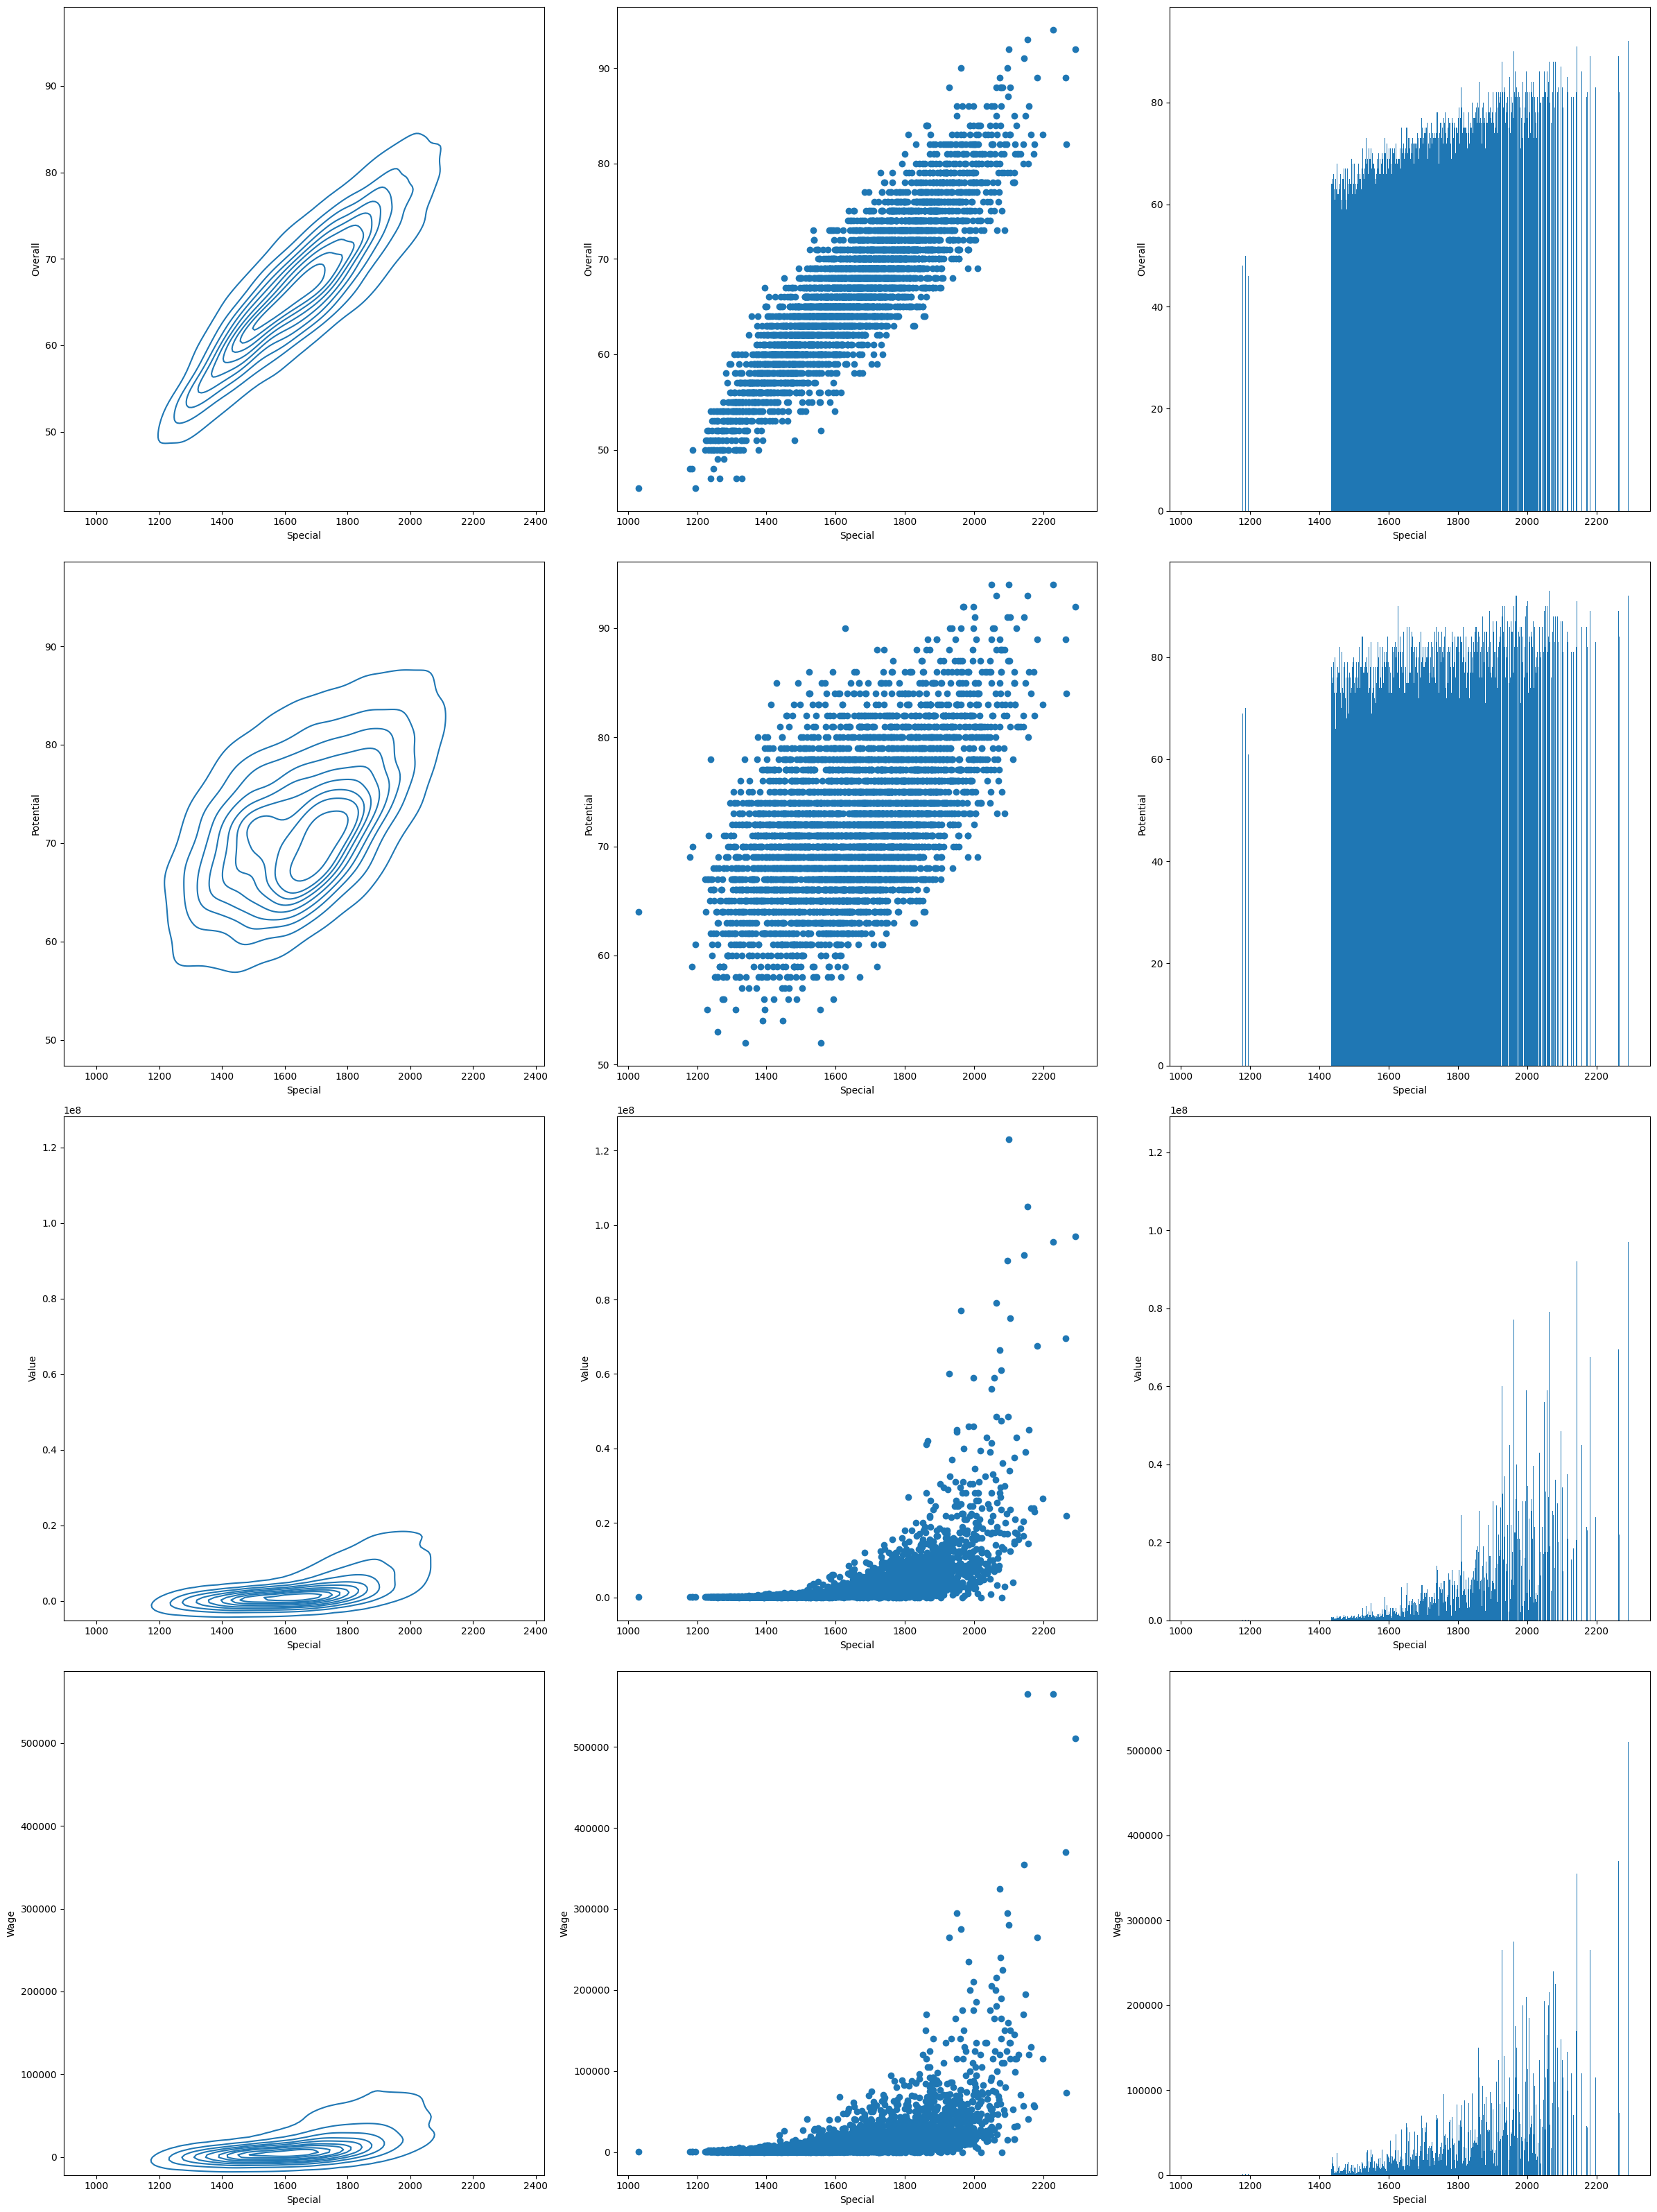

In [ ]:
lst = [ 'Overall', 'Potential', 'Value', 'Wage' ]

fig, axes = pyplot.subplots( 4, 3, figsize=( 24, 32 ) )

for feature, ax in zip( lst, axes ):

  sns.kdeplot(data=keepers, x='Special', y=feature, ax = ax[0])

  ax[1].scatter( keepers.Special, keepers[feature] )
  ax[1].set_xlabel("Special")
  ax[1].set_ylabel( feature )

  ax[2].bar( x=keepers.Special, height=keepers[feature], width=0.8 )
  ax[2].set_xlabel("Special")
  ax[2].set_ylabel( feature )

pyplot.tight_layout()
pyplot.show()

In [ ]:
keepers.shape

(4562, 35)

In [ ]:
keepers.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Jumping', 'Long passing',
       'Long shots', 'Penalties', 'Positioning', 'Short passing', 'Shot power',
       'Sprint speed', 'Stamina', 'Vision', 'Volleys', 'Strength', 'Reactions',
       'Overall', 'Potential', 'Wage', 'Value'],
      dtype='object')

In [ ]:
lst = keepers.drop(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Overall', 'Potential', 'Value', 'Wage', 'Special'], axis=1).columns.tolist()

rows = 25
cols = 4

fig, axes = pyplot.subplots( rows, cols, figsize=( cols * 8, rows * 6 ) )

for feature, ax in zip( lst, axes ):

  sns.kdeplot(data=keepers, x='Special', y=feature, ax = ax[0])

  ax[1].scatter( keepers.Special, keepers[feature] )
  ax[1].set_xlabel("Special")
  ax[1].set_ylabel( feature )

  ax[2].bar( x=keepers.Special, height=keepers[feature], width=0.8 )
  ax[2].set_xlabel("Special")
  ax[2].set_ylabel( feature )

pyplot.tight_layout()
pyplot.show()

# More Analysis

In [ ]:
keepers.columns

Index(['Name', 'Nationality', 'Club', 'Preferred Positions', 'Age', 'Special',
       'Acceleration', 'Aggression', 'Agility', 'Balance', 'Ball control',
       'Composure', 'Crossing', 'Curve', 'Dribbling', 'Finishing',
       'Free kick accuracy', 'Heading accuracy', 'Jumping', 'Long passing',
       'Long shots', 'Penalties', 'Positioning', 'Short passing', 'Shot power',
       'Sprint speed', 'Stamina', 'Vision', 'Volleys', 'Strength', 'Reactions',
       'Overall', 'Potential', 'Wage', 'Value'],
      dtype='object')

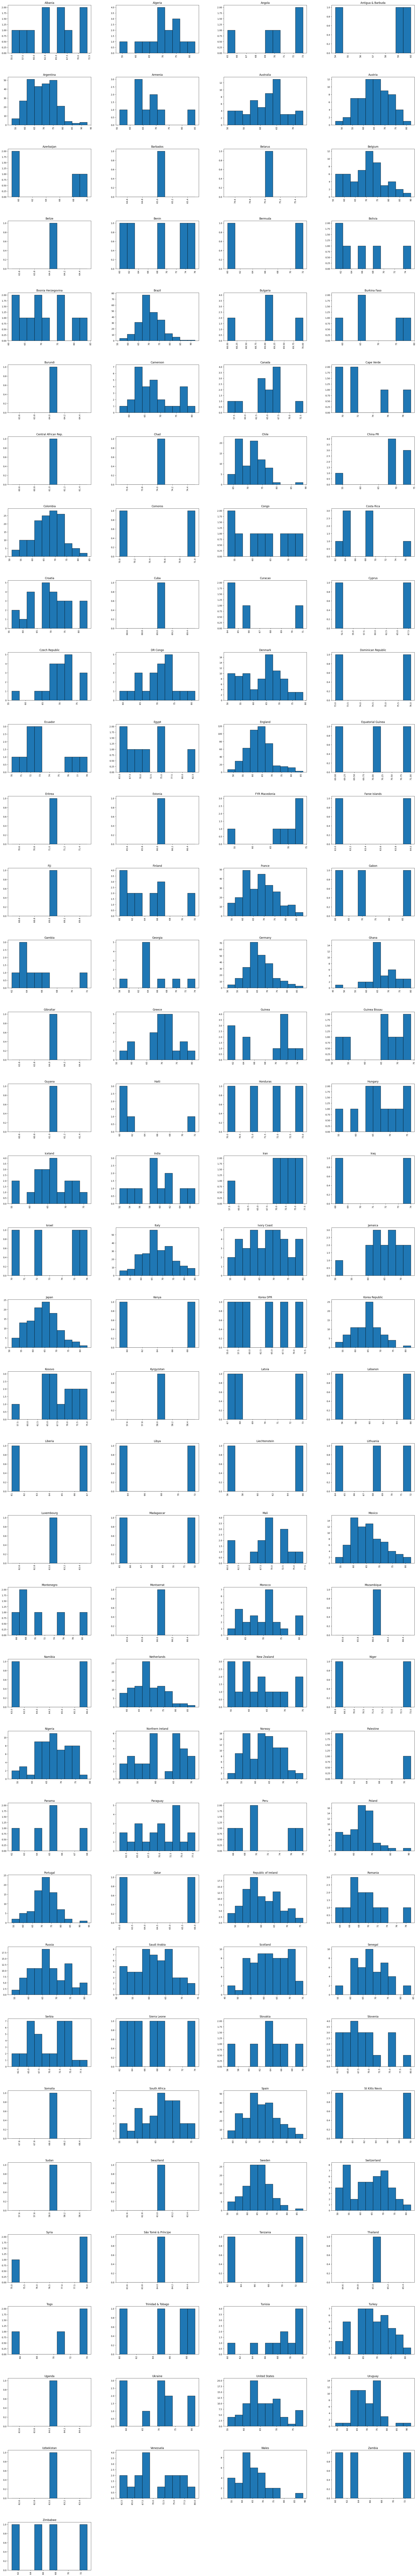

In [ ]:
keepers['Overall'].hist( by=keepers['Nationality'], figsize=( 32, 50 * 6 ), layout=( 50, 4 ), ec='black' )

pyplot.show()